# **Download The Dataset**

In [1]:
# Download the dataset
!wget https://github.com/karoldvl/ESC-50/archive/master.zip

# Unzip dataset and delete zip file
!unzip /content/master.zip && rm /content/master.zip


--2022-01-01 19:39:37--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2022-01-01 19:39:38--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/master [following]
--2022-01-01 19:39:38--  https://codeload.github.com/karolpiczak/ESC-50/zip/master
Resolving codeload.github.com (codeload.github.com)... 13.112.159.149
Connecting to codeload.github.com (codeload.github.com)|13.112.159.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ] 6

# **Audio Signal Processing**

## **Music Feature Extraction in Python**
[link](https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d)

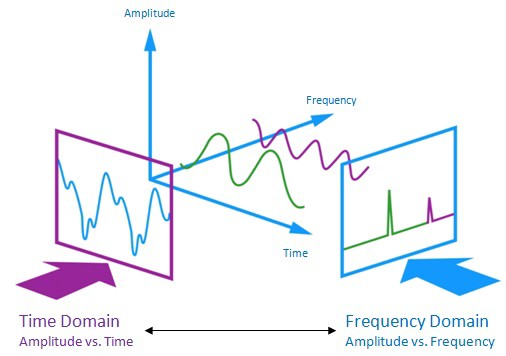

In [2]:
# Librosa is a Python module to analyze audio signals 
!pip install librosa

In [6]:
# Loading an audio file
import librosa
audio_data = "/content/ESC-50-master/audio/1-100038-A-14.wav"
# audio_data = "/content/ESC-50-master/audio/1-101336-A-30.wav"

# sr = sampling rate. It is the number of samples per second.
# 20 Hz to 20 kHz is the audible range for human beings. we used 20000Hz 
x , sr = librosa.load(audio_data, sr=20000)
print(type(x), type(sr))

# Play the audio
import IPython.display as ipd
ipd.Audio(audio_data)


<class 'numpy.ndarray'> <class 'int'>


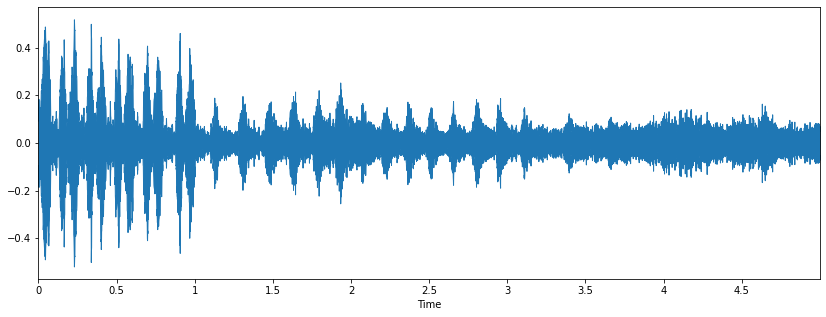

In [7]:
"""
Visualizing Audio:
We can plot the audio array using librosa.display.waveplot.
Waveplots let us know the loudness of the audio at a given time.
Time - Amplitude
"""
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


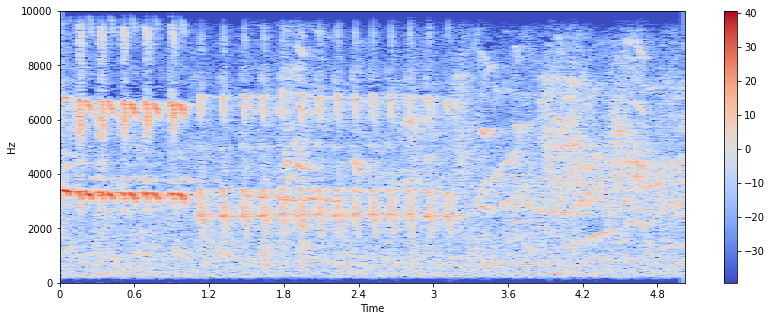

In [8]:
# Spectrogram : Time - Frequency
# .stft converts data into short term Fourier transform.
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()


## **Feature Extraction**

In [9]:
# Normalising the spectral centroid for visualisation
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
    
print("Done ...")


Done ...


spectral_centroids.shape : (196,)


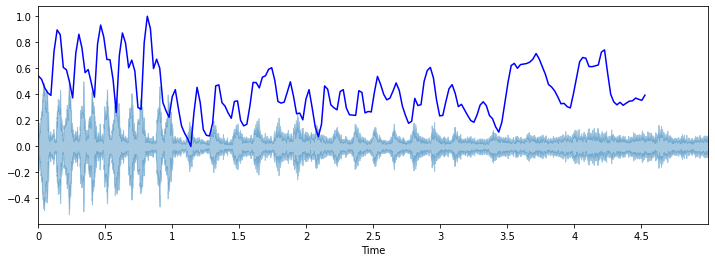

In [10]:
# Spectral Centroid
"""
It indicates where the ”centre of mass” for a sound is located and 
is calculated as the weighted mean of the frequencies present in the sound. 
"""
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print("spectral_centroids.shape :",spectral_centroids.shape)
# print(spectral_centroids)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color="b")


spectral_rolloff.shape : (196,)


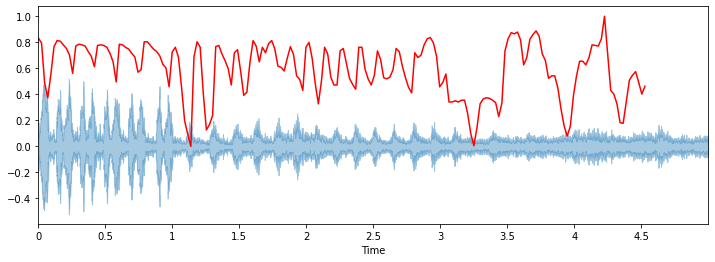

In [11]:
# Spectral Rolloff
"""
Spectral rolloff is the frequency below which a specified percentage 
of the total spectral energy, e.g. 85%, lies.
roll_percent=0.85
"""
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr, roll_percent=0.85)[0]
print("spectral_rolloff.shape :",spectral_rolloff.shape)

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color="r")


(196,)
(196,)
(196,)


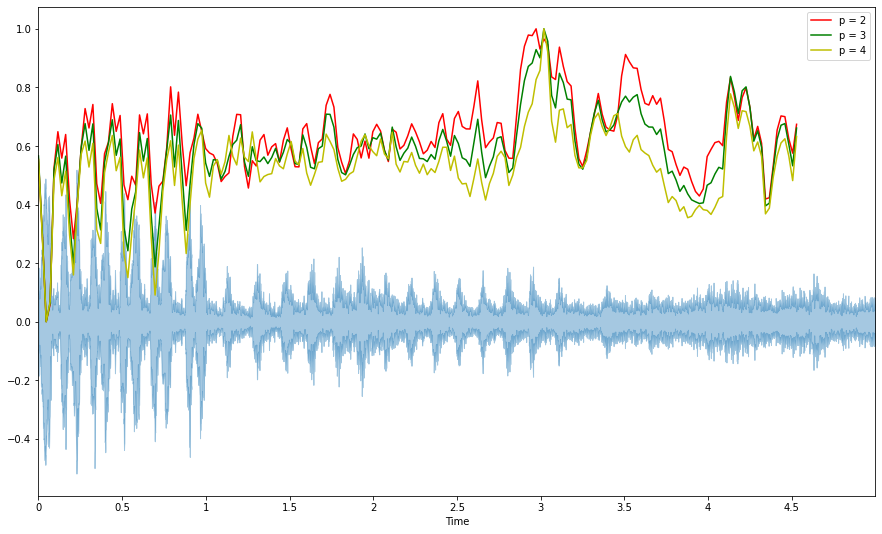

In [12]:
# Spectral Bandwidth
"""
The spectral bandwidth or spectral spread is derived from the spectral centroid. 
It is the spectral range of interest around the centroid, that is, the variance 
from the spectral centroid. It has a direct correlation with the perceived timbre. 
"""
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color="r")
plt.plot(t, normalize(spectral_bandwidth_3), color="g")
plt.plot(t, normalize(spectral_bandwidth_4), color="y")

plt.legend(("p = 2", "p = 3", "p = 4"))

print(spectral_bandwidth_2.shape)
print(spectral_bandwidth_3.shape)
print(spectral_bandwidth_4.shape)


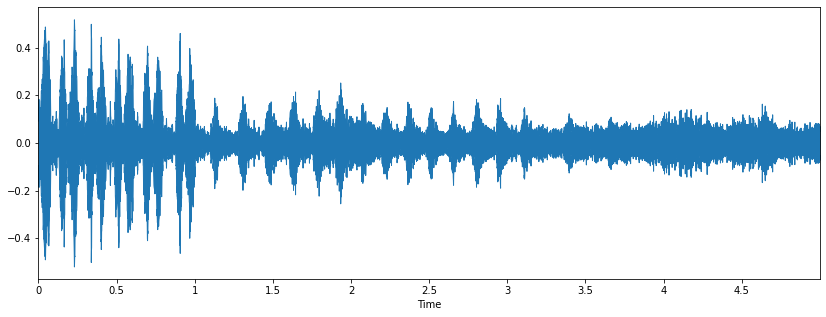

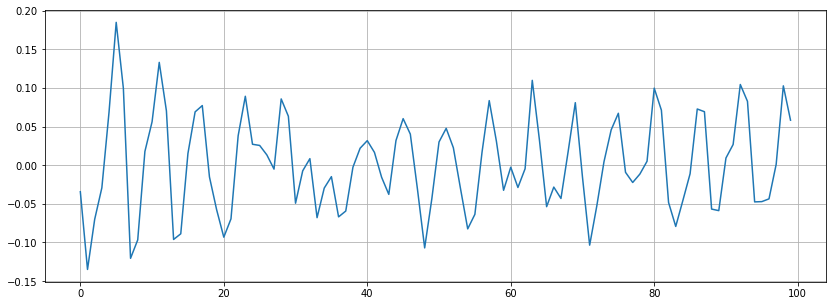

In [13]:
# Zero-Crossing Rate
"""
The zero-crossing rate is the rate of sign-changes along a signal, 
i.e., the rate at which the signal changes from positive to negative or back.
"""
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 0
n1 = 100

plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


In [14]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print("zero_crossings = ",sum(zero_crossings))


zero_crossings =  33


mfccs.shape :  (20, 196)


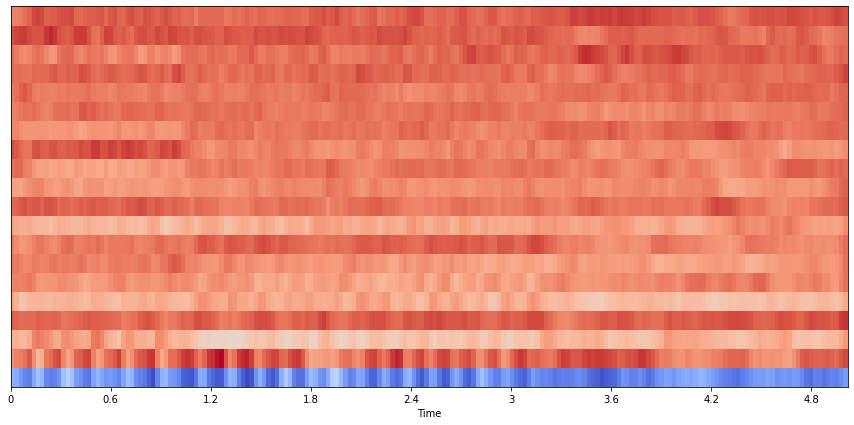

In [15]:
# Mel-Frequency Cepstral Coefficients(MFCCs)
"""
This feature is one of the most important method to extract a feature of an audio signal 
and is used majorly whenever working on audio signals. 
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set 
of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
"""
mfccs = librosa.feature.mfcc(x, sr=sr)
print("mfccs.shape : ",mfccs.shape)

# Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")


chromagram.shape :  (12, 196)


[Text(0.5, 1.0, 'Chromagram')]

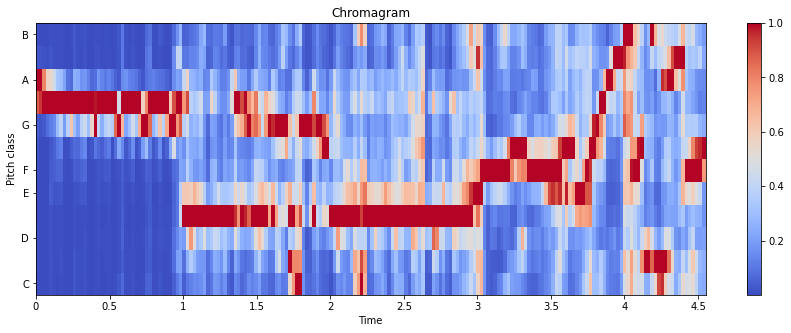

In [16]:
# Chroma feature
"""
Compute a chromagram from a waveform or power spectrogram.
"""
chromagram = librosa.feature.chroma_stft(x, sr=sr)
print("chromagram.shape : ",chromagram.shape)

fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", cmap="coolwarm")
fig.colorbar(img, ax=ax)
ax.set(title="Chromagram")


# **Example**

In [17]:
# Load dataset
import pandas as pd
df = pd.read_csv("/content/ESC-50-master/meta/esc50.csv")

# Display dimensions of dataframe
print(df.shape)
print(df.info())

print("-----------------------------------------------------------------------")
# Display first 10 records
print(df.head(10))

print("category : \n",df["category"].value_counts())


(2000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
None
-----------------------------------------------------------------------
            filename  fold  target         category  esc10  src_file take
0   1-100032-A-0.wav     1       0              dog   True    100032    A
1  1-100038-A-14.wav     1      14   chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36   vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36   vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19 

In [18]:
filenames  = df["filename"]
categories = df["category"]

my_categories = ["cat", "cow", "dog", "sheep" ]
# my_categories = ["cat", "dog"]

print("filenames  : ",len(filenames))
print("categories : ",len(categories))


filenames  :  2000
categories :  2000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

#*******************************************************************************
#*******************************************************************************
def read_audios(filenames, categories):
  lst_audios = []
  labels = []
  for i in range(len(filenames)):
    x , sr = librosa.load("/content/ESC-50-master/audio/"+filenames[i]) 
    aud = [x, sr]     
    lst_audios.append(aud)
    labels.append(categories[i])
  return lst_audios, labels

def read_audios_small(filenames, categories, my_categories):
  lst_audios = []
  labels = []
  for i in range(len(filenames)):
    if categories[i] in my_categories:
      x , sr = librosa.load("/content/ESC-50-master/audio/"+filenames[i]) 
      aud = [x, sr]     
      lst_audios.append(aud)
      labels.append(categories[i])
  return lst_audios, labels

#*******************************************************************************
#******************************************************************************* 

# Load The Dataset 
lst_audios, labels = read_audios_small(filenames, categories, my_categories)

print("len lst_audios : ",len(lst_audios))
print("labels : ",labels)

# Encoding Categorical Labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
print("labels : ",labels)


len lst_audios :  160
labels :  ['dog', 'dog', 'sheep', 'cow', 'sheep', 'sheep', 'cow', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'sheep', 'sheep', 'cat', 'cat', 'sheep', 'cow', 'dog', 'cow', 'cow', 'sheep', 'cow', 'cow', 'cat', 'cow', 'dog', 'sheep', 'dog', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cat', 'cat', 'sheep', 'sheep', 'dog', 'dog', 'dog', 'dog', 'cow', 'cow', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cow', 'cow', 'cow', 'cow', 'dog', 'sheep', 'sheep', 'sheep', 'sheep', 'dog', 'cat', 'cat', 'cat', 'cow', 'cow', 'dog', 'dog', 'cow', 'dog', 'cow', 'dog', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'sheep', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cow', 'cow', 'cow', 'cow', 'cow', 'dog', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'cow', 'cow', 'cow', 'sheep', 'cat', 

In [20]:
# Extracting features
X = []
for i in range(len(lst_audios)):
  elem = lst_audios[i]
  # Mel-Frequency Cepstral Coefficients(MFCCs)
  mfccs = librosa.feature.mfcc(elem[0], sr=elem[1])

  mfccs_scaled = np.mean(mfccs.T,axis=0)

  X.append(mfccs_scaled)

X = np.asarray(X)

# Standardization
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(X)
X_st_scaler = st_scaler.transform(X)

print(X_st_scaler.shape)


(160, 20)


In [21]:
y = np.asarray(labels)

# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_st_scaler, y, 
                                test_size= 0.20, random_state=100)
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)


X_train :  (128, 20)   X_test :  (32, 20)


## **ML**

-----------------------------------------------------------------------
cls : LogisticRegression  Accuracy:  0.6619047619047619
-----------------------------------------------------------------------
-----------------------------------------------------------------------
cls : RandomForestClassifier  Accuracy:  0.6238095238095237
-----------------------------------------------------------------------
-----------------------------------------------------------------------
cls : SVC  Accuracy:  0.5952380952380951
-----------------------------------------------------------------------
-----------------------------------------------------------------------
cls : MLPClassifier  Accuracy:  0.6285714285714284
-----------------------------------------------------------------------
[2 0 0 3 0 3 3 0 1 3 2 2 1 2 0 3 3 3 0 2 2 2 2 0 1 0 1 2 1 1 2 3]
Classification report : 
 VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                             

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix: 
 [[5 0 0 0]
 [0 6 3 0]
 [3 0 7 0]
 [0 0 0 8]]


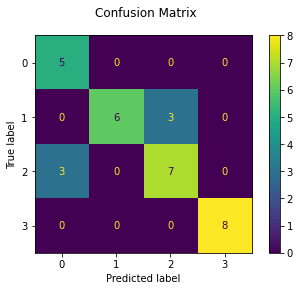

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# Classifiers
log_clf1 = LogisticRegression()
rnd_clf2 = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=100)
svm_clf3 = SVC(kernel="linear")
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(256, 128, ), batch_size=16,
                    solver="adam", alpha=0.001, activation="logistic", 
                    max_iter=50000, random_state=42)

# Voting Classifier : hard
voting_clf = VotingClassifier(
             estimators=[("lr", log_clf1), ("rf", rnd_clf2), 
            ("svc", svm_clf3), ("mlp", mlp_clf4)],
            voting="hard",
            weights=[1,1,1,1]
            )

# Train the classifier
voting_clf.fit(X_train, y_train)

# Classification report 
for clf in (log_clf1, rnd_clf2, svm_clf3, mlp_clf4):
    scores = cross_val_score(clf, X_test, y_test, scoring="accuracy")
    print("-----------------------------------------------------------------------")
    print("cls :",clf.__class__.__name__," Accuracy: ", scores.mean())
    print("-----------------------------------------------------------------------")

predicted = voting_clf.predict(X_test)
print(predicted)
print("Classification report : \n", voting_clf,"\n", metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(voting_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


Classification report : 
 VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=100)),
                             ('svc', SVC(kernel='linear', probability=True)),
                             ('mlp',
                              MLPClassifier(activation='logistic', alpha=0.001,
                                            batch_size=16,
                                            hidden_layer_sizes=(256, 128),
                                            max_iter=50000, random_state=42))],
                 voting='soft', weights=[1, 1, 1, 1]) 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       1.00      0.67      0.80         9
           2       0.80      0.80      0.80        10
           3       0.80      1.00      0.89         8

   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


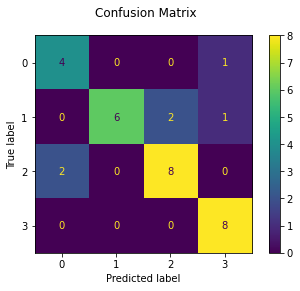

In [ ]:
# Classifiers
log_clf1 = LogisticRegression()
rnd_clf2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=100)
svm_clf3 = SVC(kernel="linear", probability=True) # probability
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(256, 128, ), batch_size=16,
                    solver="adam", alpha=0.001, activation="logistic", 
                    max_iter=50000, random_state=42)

# Voting Classifier : soft
voting_clf = VotingClassifier(
             estimators=[("lr", log_clf1), ("rf", rnd_clf2), 
            ("svc", svm_clf3), ("mlp", mlp_clf4)],
            voting="soft",
            weights=[1,1,1,1]
            )

# Train the classifier
voting_clf.fit(X_train, y_train)

predicted = voting_clf.predict_proba(X_test)
predicted = np.argmax(predicted, axis=1)

print("Classification report : \n", voting_clf,"\n", metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(voting_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


## **DL**

In [22]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Creating the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[20,]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(5, activation="softmax"))
# model.add(keras.layers.Dense(1, activation="sigmoid"))

# The model’s summary() method displays all the model’s layers
print(model.summary())

# Compiling the model
# model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

# Training the model 
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test
                                                                                  , y_test))


In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)


X_train :  (128, 20, 1)   X_test :  (32, 20, 1)


In [27]:
# CNN
model =  keras.models.Sequential()
model.add(keras.layers.Conv1D(128, 5, activation="selu", input_shape=(20,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Conv1D(256, 3, activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Conv1D(256, 3, activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))

model.add(keras.layers.Flatten())
layer1 = keras.layers.Dense(64, activation="selu", kernel_initializer="he_normal",  
                                kernel_regularizer=keras.regularizers.l2(0.01))
output = keras.layers.Dense(4, activation="softmax", kernel_initializer="glorot_uniform",  
                                kernel_regularizer=keras.regularizers.l2(0.01))

model.add(layer1)
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(output)

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 16, 128)           768       
                                                                 
 batch_normalization_4 (Batc  (None, 16, 128)          512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 128)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 14, 256)           98560     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 256)          1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 256)          

In [28]:
# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, 
                                  beta_2=0.999, clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Training the model 
history = model.fit(X_train, y_train, epochs=150, batch_size=40, 
                    validation_data=(X_test, y_test))


Epoch 1/150
4/4 [==============================] - 4s 201ms/step - loss: 2.7203 - accuracy: 0.3672 - val_loss: 2.4989 - val_accuracy: 0.6875
Epoch 2/150
4/4 [==============================] - 0s 27ms/step - loss: 1.8672 - accuracy: 0.7969 - val_loss: 2.4076 - val_accuracy: 0.8125
Epoch 3/150
4/4 [==============================] - 0s 27ms/step - loss: 1.7976 - accuracy: 0.8828 - val_loss: 2.3500 - val_accuracy: 0.8125
Epoch 4/150
4/4 [==============================] - 0s 26ms/step - loss: 1.6762 - accuracy: 0.9297 - val_loss: 2.2945 - val_accuracy: 0.8125
Epoch 5/150
4/4 [==============================] - 0s 28ms/step - loss: 1.6006 - accuracy: 0.9219 - val_loss: 2.2429 - val_accuracy: 0.8438
Epoch 6/150
4/4 [==============================] - 0s 24ms/step - loss: 1.5646 - accuracy: 0.9297 - val_loss: 2.2007 - val_accuracy: 0.8438
Epoch 7/150
4/4 [==============================] - 0s 26ms/step - loss: 1.4528 - accuracy: 0.9688 - val_loss: 2.1568 - val_accuracy: 0.8750
Epoch 8/150
4/4 [==

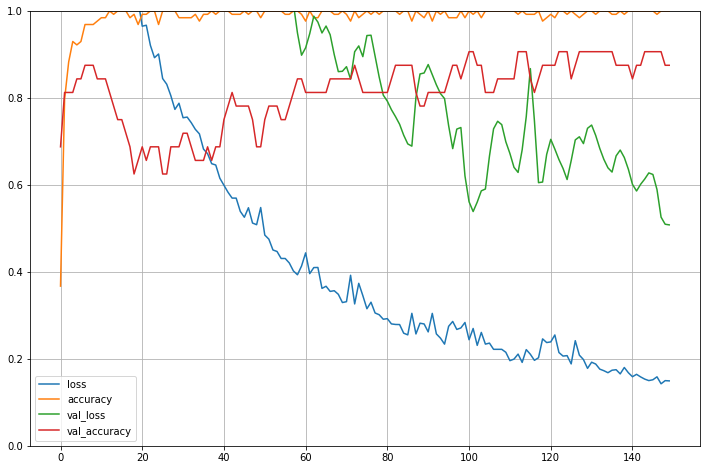

1/1 [==============================] - 0s 283ms/step - loss: 0.5080 - accuracy: 0.8750
Loss     :  0.5080138444900513
accuracy :  0.875


In [29]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


Classification report : 
               precision    recall  f1-score   support

         cat       0.67      0.80      0.73         5
         cow       1.00      0.89      0.94         9
         dog       0.89      0.80      0.84        10
       sheep       0.89      1.00      0.94         8

    accuracy                           0.88        32
   macro avg       0.86      0.87      0.86        32
weighted avg       0.89      0.88      0.88        32

Confusion matrix : 



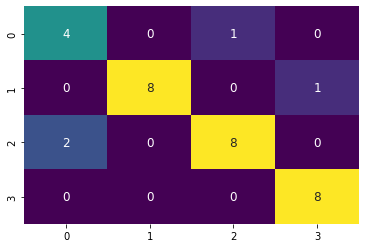

Normalized confusion matrix : 



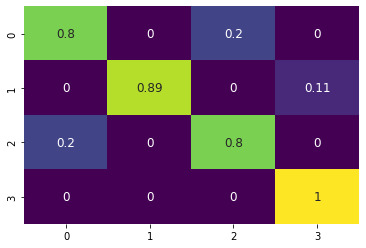

In [31]:
# Confusion Matrix
# y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

class_names = ["cat", "cow", "dog", "sheep" ]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


# Make predictions
# predicted = model.predict(X_new)

# Save the model
# model.save("/content/my_model.h5")


# **Inference**

In [32]:
!pip install gradio

     |████████████████████████████████| 900 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 45.5 MB/s 
     |████████████████████████████████| 210 kB 48.3 MB/s 
     |████████████████████████████████| 3.6 MB 38.1 MB/s 
     |████████████████████████████████| 61 kB 443 kB/s 
     |████████████████████████████████| 961 kB 46.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=d65f47b1b3e6079e7e1cf0581992dc0dc58b783bd733ae3b286d29cba7e46088
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=6cbbb4b70a2ce3235eb4d632dc78f34aab5963a67b552cc87f6d1afc6d5d3b7c
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


## **ML**

In [ ]:
# https://www.gradio.app/ml_examples

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

def pad_trunc (mfccs, my_features):
  nbr_features = mfccs.shape[0]
  if nbr_features < my_features:
    pad = my_features - nbr_features
    mfccs = np.pad(mfccs, (0, pad), "constant", constant_values=(0))

  elif nbr_features > my_features:
    trunc = nbr_features - my_features
    for i in range(trunc):
      mfccs = np.delete(mfccs, mfccs_scaled.shape[0]-1)
  
  return mfccs

def inference(audio):
    labels = ["cat", "cow", "dog", "sheep" ]
    my_features = 20
    aud = audio.name
    x , sr = librosa.load(aud) 
    mfccs = librosa.feature.mfcc(x, sr=sr)

    mfccs_scaled = np.mean(mfccs.T,axis=0)
    mfccs_scaled = mfccs_scaled.reshape(1, -1)
    mfccs_scaled = st_scaler.transform(mfccs_scaled).flatten()

    mfccs_scaled = pad_trunc (mfccs_scaled, my_features)

    mfccs_scaled = mfccs_scaled.reshape(-1, 20)

    # voting="soft"
    pred = voting_clf.predict_proba(mfccs_scaled).flatten()
    return {labels[i]: float(pred[i]) for i in range(len(labels))}

# source="upload"  "microphone"
nbr_top_classes = 4
gr.Interface(fn=inference, 
             inputs=gr.inputs.Audio(source="microphone", type="file", label="Input Audio"), 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes)).launch(share=True) #, debug=True Use in Colab


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Your interface requires microphone or webcam permissions - this may cause issues in Colab. Use the External URL in case of issues.
Running on public URL: https://41344.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://41344.gradio.app')

## **DL**

In [ ]:
aud = "/content/ESC-50-master/audio/1-100032-A-0.wav"
x , sr = librosa.load(aud)
mfccs = librosa.feature.mfcc(x, sr=sr)
mfccs_scaled = np.mean(mfccs.T,axis=0)
print(mfccs_scaled.shape)
print(mfccs_scaled)

# NN
# mfccs_scaled = mfccs_scaled.reshape(1, 20)

# CNN
mfccs_scaled = mfccs_scaled.reshape(1, 20,1)

pred = model.predict(mfccs_scaled).flatten()

print(pred)


(20,)
[-6.0096918e+02  4.7353296e+00 -8.5468931e+00 -4.2358022e+00
 -8.5924041e-01 -1.9330620e+00 -3.3468968e-01  8.6515081e-01
  7.8212482e-01  4.7982040e-01 -5.1504910e-01 -2.0849334e-01
 -8.9800996e-01  4.9611533e-01 -1.1548634e-01 -3.0010924e-01
 -1.1466600e+00 -6.0494319e-02 -1.5721628e-01  5.0111890e-01]
[0.13958741 0.03581167 0.68034375 0.11823475 0.02602243]


In [34]:
# https://www.gradio.app/ml_examples

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

def pad_trunc (mfccs, my_features):
  nbr_features = mfccs.shape[0]
  if nbr_features < my_features:
    pad = my__features - nbr_features
    mfccs = np.pad(mfccs, (0, pad), "constant", constant_values=(0))

  elif nbr_features > my_features:
    trunc = nbr_features - my_features
    for i in range(trunc):
      mfccs = np.delete(mfccs, mfccs_scaled.shape[0]-1)
  
  return mfccs

def inference(audio):
    labels = ["cat", "cow", "dog", "sheep" ]
    my_features = 20
    aud = audio.name
    x , sr = librosa.load(aud) 
    mfccs = librosa.feature.mfcc(x, sr=sr)

    mfccs_scaled = np.mean(mfccs.T,axis=0)
    mfccs_scaled = pad_trunc (mfccs_scaled, my_features)

    # NN
    # mfccs_scaled = mfccs_scaled.reshape(1, 20)
    # CNN
    mfccs_scaled = mfccs_scaled.reshape(1, 20,1)

    pred = model.predict(mfccs_scaled).flatten()
    return {labels[i]: float(pred[i]) for i in range(len(labels))}

# source="upload"  "microphone"
nbr_top_classes = 4
gr.Interface(fn=inference, 
             inputs=gr.inputs.Audio(source="microphone", type="file", label="Input Audio"), 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes)).launch(share=True) #, debug=True Use in Colab


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Your interface requires microphone or webcam permissions - this may cause issues in Colab. Use the External URL in case of issues.
Running on public URL: https://34261.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://34261.gradio.app')